In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os

from nn_trainer import NNTrainer

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
PATH_TO_DATA = 'data'

In [15]:
full_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'housing.csv'))

## Dataset preparation

This step shows a minimalistic loading and processing pipeline of the `MNIST` dataset.

In [16]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_train_ds.csv'))
print(train_df.shape)
train_df.head()

(15480, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,248200.0,0.609553,-0.633700,0.105068,0.267195,...,0.564075,0.260427,0.593930,0.594737,-0.993357,-0.220070,0.293305,0.672435,-1.128013,-0.911534
1,False,False,False,False,False,187900.0,0.559735,-0.558979,-1.003622,4.990733,...,2.498532,2.484381,2.502352,0.522846,-0.915681,-0.219115,-0.040686,0.630292,-0.935963,-0.353076
2,False,False,False,False,False,295500.0,0.893517,-0.909234,-1.003622,0.353398,...,0.460031,0.227824,0.669097,0.921515,-0.854024,-0.223714,-0.154210,0.850102,-0.800596,-1.122943
3,False,False,False,False,False,175000.0,0.624499,-0.722431,-0.132509,-1.125025,...,-1.658982,-2.012828,-3.046265,0.653895,-1.062084,-0.220810,1.803470,0.706231,-1.323701,4.382670
4,False,False,True,False,False,169600.0,-1.308445,1.005496,0.896989,-0.731088,...,-0.710034,-0.696222,-0.887709,-1.462103,1.152951,0.421744,-0.453060,-1.756723,1.121867,0.500505


In [17]:

test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'final_test_ds.csv'))
print(test_df.shape)
test_df.head()

(5160, 26)


,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,age_clipped,median_house_value,longitude,latitude,housing_median_age,total_rooms,...,population_log,total_bedrooms_log,total_rooms_log,distance_to_SF,distance_to_LA,1/distance_to_SF,1/distance_to_LA,log_distance_to_SF,log_distance_to_LA,bedroom/rooms
0,False,False,False,False,False,238800.0,-1.129099,0.748642,-0.370085,2.481122,...,1.735792,1.527195,1.810945,-1.234743,0.889603,-0.060341,-0.448252,-1.194064,0.978939,-0.888829
1,True,False,False,False,False,108800.0,1.052935,-0.717761,-1.716352,-0.407132,...,-0.074206,0.148613,-0.211315,0.917958,-0.772674,-0.223680,-0.238090,0.848279,-0.640258,0.972822
2,True,False,False,False,False,72700.0,-0.566154,0.818693,0.896989,-0.907201,...,-0.488293,-1.341681,-1.480309,-0.849448,0.618533,-0.163285,-0.441761,-0.560282,0.814415,0.393340
3,False,False,False,True,False,500001.0,0.589626,-0.848523,0.105068,0.368692,...,0.416976,1.062383,0.682002,0.707420,-0.983821,-0.221446,0.227769,0.736154,-1.102938,0.946990
4,False,False,False,True,False,399200.0,0.395336,-0.689741,-1.557968,12.869011,...,3.323073,3.124321,3.596744,0.500945,-0.871126,-0.218810,-0.128914,0.617209,-0.836826,-1.342553


In [18]:
# Main function

trainer = NNTrainer(train_df, test_df)

In [19]:
num_epochs = 200
hist, history_not_n = trainer.fit(num_epochs)

################################  0  ################################
Total loss (MSE):  0.0756
Total loss not normalized (RMSE):  133353.1094
Total loss (MSE):  0.0707
Total loss not normalized (RMSE):  128920.1953
Total loss (MSE):  0.0436
Total loss not normalized (RMSE):  101260.4688
Total loss (MSE):  0.0518
Total loss not normalized (RMSE):  110366.3281
Total loss (MSE):  0.0431
Total loss not normalized (RMSE):  100729.1875
Total loss (MSE):  0.0308
Total loss not normalized (RMSE):  85095.0234
Total loss (MSE):  0.0291
Total loss not normalized (RMSE):  82737.2969
Total loss (MSE):  0.0256
Total loss not normalized (RMSE):  77540.4297
Total loss (MSE):  0.0239
Total loss not normalized (RMSE):  74929.0156
Total loss (MSE):  0.0266
Total loss not normalized (RMSE):  79081.3984
Total loss (MSE):  0.0239
Total loss not normalized (RMSE):  74984.5625
Total loss (MSE):  0.0196
Total loss not normalized (RMSE):  67855.0
Total loss (MSE):  0.0216
Total loss not normalized (RMSE):  712

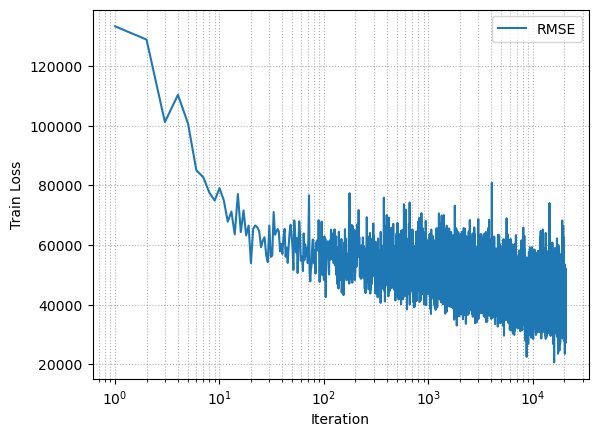

In [20]:
trainer.plot_loss_function(history_not_n, label='RMSE')

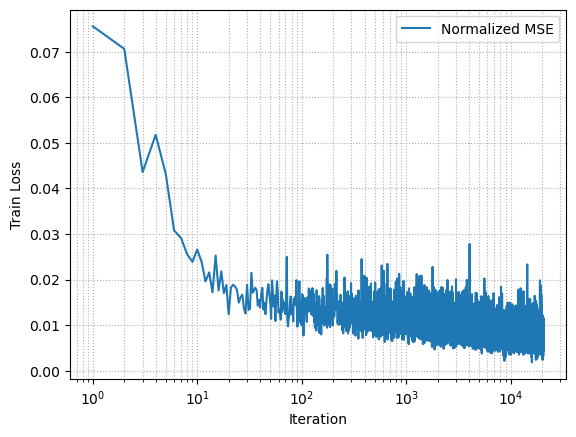

In [21]:
trainer.plot_loss_function(hist, label = 'Normalized MSE')

In [22]:
trainer.test_model()

Normalized values
Mean Squared Error (MSE): 0.0114
Root Mean Squared Error (RMSE): 0.107
Mean Absolute Error (MAE): 0.0705
R-squared (R2): 0.7954 

Unnormalized values
Mean Squared Error (MSE): 2692925173.81
Root Mean Squared Error (RMSE): 51893.4
Mean Absolute Error (MAE): 34170.62
R-squared (R2): 0.7954
